<a href="https://colab.research.google.com/github/Aditi-SK/ARM-ALP-Programs/blob/main/POTHOLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.3/904.3 kB 30.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
!ls /content/drive/My\ Drive/Dataset/Pothole

data.yaml  README.dataset.txt  README.roboflow.txt  Test  Train  valid


In [ ]:
!yolo task=detect mode=train model=yolov8l.pt data=../content/drive/MyDrive/Dataset/Pothole/data.yaml epochs=100 imgsz=640

100% 83.7M/83.7M [00:01<00:00, 72.9MB/s]
Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=../content/drive/MyDrive/Dataset/Pothole/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fa

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained model
model = YOLO('/content/drive/MyDrive/Pothole_Detector/Weights/best (4).pt')

# Retrieve training results
metrics = model.results  # This retrieves the training metrics if available

# Assuming metrics contain key information
epochs = list(range(1, len(metrics['metrics/mAP_50']) + 1))
val_mAP50 = metrics['metrics/mAP_50']  # mAP@50 for validation
val_mAP50_95 = metrics['metrics/mAP_50:95']  # mAP@50:95 for validation
train_loss = metrics['metrics/loss']  # Loss during training

# Plotting Validation Metrics
plt.figure(figsize=(10, 6))
plt.plot(epochs, val_mAP50, label='Validation mAP@50', marker='o')
plt.plot(epochs, val_mAP50_95, label='Validation mAP@50:95', marker='o')
plt.xlabel('Epochs')
plt.ylabel('mAP')
plt.title('Validation Metrics')
plt.legend()
plt.grid()
plt.show()

# Plotting Training Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid()
plt.show()


AttributeError: 'DetectionModel' object has no attribute 'results'

In [ ]:
from ultralytics import YOLO

# Load the trained YOLOv8 model
model = YOLO('/content/drive/MyDrive/Pothole_Detector/Weights/best (1).pt')

# Perform validation on the dataset
results = model.val(data='/content/drive/MyDrive/Dataset/Pothole/data.yaml', imgsz=640)

# Access evaluation metrics
print("Validation Metrics:")
print(f"mAP@50: {results.box.map50:.4f}")  # Changed from results.box.map[0]
print(f"mAP@50:95: {results.box.map:.4f}")    # Changed from results.box.map[1]
print(f"Precision: {results.box.ap:.4f}")
print(f"Recall: {results.box.ar:.4f}")

# You can also visualize predictions on test data (optional)
model.predict(source='path/to/test/images', save=True)

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs


val: Scanning /content/drive/MyDrive/Dataset/Pothole/valid/labels.cache... 118 images, 0 backgrounds, 0 corrupt: 100%|██████████| 118/118 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.22it/s]


                   all        118        447      0.415      0.413      0.373      0.132
Speed: 0.4ms preprocess, 39.7ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/val4
Validation Metrics:
mAP@50: 0.3734
mAP@50:95: 0.1317
Precision: 0.1317


AttributeError: 'Metric' object has no attribute 'ar'. See valid attributes below.

    Class for computing evaluation metrics for YOLOv8 model.

    Attributes:
        p (list): Precision for each class. Shape: (nc,).
        r (list): Recall for each class. Shape: (nc,).
        f1 (list): F1 score for each class. Shape: (nc,).
        all_ap (list): AP scores for all classes and all IoU thresholds. Shape: (nc, 10).
        ap_class_index (list): Index of class for each AP score. Shape: (nc,).
        nc (int): Number of classes.

    Methods:
        ap50(): AP at IoU threshold of 0.5 for all classes. Returns: List of AP scores. Shape: (nc,) or [].
        ap(): AP at IoU thresholds from 0.5 to 0.95 for all classes. Returns: List of AP scores. Shape: (nc,) or [].
        mp(): Mean precision of all classes. Returns: Float.
        mr(): Mean recall of all classes. Returns: Float.
        map50(): Mean AP at IoU threshold of 0.5 for all classes. Returns: Float.
        map75(): Mean AP at IoU threshold of 0.75 for all classes. Returns: Float.
        map(): Mean AP at IoU thresholds from 0.5 to 0.95 for all classes. Returns: Float.
        mean_results(): Mean of results, returns mp, mr, map50, map.
        class_result(i): Class-aware result, returns p[i], r[i], ap50[i], ap[i].
        maps(): mAP of each class. Returns: Array of mAP scores, shape: (nc,).
        fitness(): Model fitness as a weighted combination of metrics. Returns: Float.
        update(results): Update metric attributes with new evaluation results.
    

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file (replace 'training_logs.csv' with your actual file)
df = pd.read_csv('training_logs.csv')

# Extract metrics
epochs = df['epoch']
train_loss = df['train_loss']
val_mAP50 = df['val_mAP50']
val_mAP50_95 = df['val_mAP50_95']

# Plotting Losses
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid()
plt.show()

# Plotting Validation Metrics
plt.figure(figsize=(10, 6))
plt.plot(epochs, val_mAP50, label='Validation mAP@50', marker='o')
plt.plot(epochs, val_mAP50_95, label='Validation mAP@50:95', marker='o')
plt.xlabel('Epochs')
plt.ylabel('mAP')
plt.title('Validation Metrics')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from ultralytics import YOLO

# Load model and start training
model = YOLO('yolov8.yaml')  # Adjust the YAML file as needed
results = model.train(data='/content/drive/MyDrive/Dataset/Pothole/data.yaml', epochs=20, imgsz=640)

# Extract metrics
train_results = results.metrics  # Extract relevant metrics after training

# Access specific metrics for plotting (example for validation mAP)
val_mAP50 = [epoch['metrics/mAP_50'] for epoch in train_results]
val_mAP50_95 = [epoch['metrics/mAP_50:95'] for epoch in train_results]
train_loss = [epoch['metrics/loss'] for epoch in train_results]

# Proceed to plot similar to the script above


WARNING ⚠️ no model scale passed. Assuming scale='n'.
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8.yaml, data=/content/drive/MyDrive/Dataset/Pothole/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_

train: Scanning /content/drive/MyDrive/Dataset/Pothole/train/labels.cache... 1230 images, 3 backgrounds, 0 corrupt: 100%|██████████| 1230/1230 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Dataset/Pothole/valid/labels.cache... 118 images, 0 backgrounds, 0 corrupt: 100%|██████████| 118/118 [00:00<?, ?it/s]

Plotting labels to runs/detect/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      3.508      3.642      4.114         52        640: 100%|██████████| 77/77 [19:33<00:00, 15.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:48<00:00, 12.19s/it]

                   all        118        447    0.00342      0.271     0.0079    0.00299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      3.117      3.405       3.63         64        640: 100%|██████████| 77/77 [18:36<00:00, 14.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:44<00:00, 11.07s/it]

                   all        118        447      0.041     0.0604     0.0154    0.00465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      2.827      3.223      3.221         66        640: 100%|██████████| 77/77 [18:36<00:00, 14.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:44<00:00, 11.09s/it]

                   all        118        447      0.127     0.0671     0.0442     0.0129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      2.813      3.111      3.116         82        640:   1%|▏         | 1/77 [00:14<18:08, 14.32s/it]

In [ ]:
/content/drive/MyDrive/Pothole_Detector/Weights/best (4).pt

In [ ]:
pip install cvzone


  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26298 sha256=fc9df48bb26e01d5e956d2671230b5cc5ac6ef431261155dce0a5c34967d888e
  Stored in directory: /root/.cache/pip/wheels/2c/9f/b3/92e945ac4a71bf727a92463f38155cc5a4fa49c5010b38ec4c
Successfully built cvzone


In [ ]:
import cv2
import math
import cvzone
from ultralytics import YOLO

ModuleNotFoundError: No module named 'cvzone'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.getcwd())


/content


In [ ]:
!ls /content/drive/My\ Drive/Pothole_Detector/Weights


best.pt


In [ ]:
yolo_model = YOLO("/content/drive/My Drive/Pothole_Detector/Weights/best.pt")


In [ ]:
# Define class names
class_labels = ['Pothole']

In [ ]:
# Load the image
image_path = "Media/pothole_1.jpeg"
img = cv2.imread(image_path)

In [ ]:
image_path = "/content/drive/My Drive/Pothole_Detector/Media/pothole_1.jpeg"


In [ ]:
import os

# Check if the file exists
image_path = "/content/drive/My Drive/Pothole_Detector/Media/pothole_1.jpeg"
if os.path.exists(image_path):
    print("File exists!")
else:
    print("File does not exist. Check the path.")


File exists!


In [ ]:
import cv2
from ultralytics import YOLO
import os

# Load YOLO model with custom weights
yolo_model = YOLO("/content/drive/My Drive/Pothole_Detector/Weights/best.pt")

# Load the image
image_path = "/content/drive/My Drive/Pothole_Detector/Media/NEWIMAGE.jpg"
img = cv2.imread(image_path)

# Check if the image was loaded correctly
if img is None:
    print("Error: Could not load image. Check the file path.")
else:
    # Perform object detection
    results = yolo_model(img)

    # Access the Results object from the list
    results = results[0]

    # Display or save the results
    results.show()  # Display results
    print(results)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Pothole_Detector/Weights/best.pt'

In [ ]:
# Perform object detection
results = yolo_model(img)



0: 448x640 (no detections), 49.8ms
Speed: 3.6ms preprocess, 49.8ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


In [ ]:
# Loop through the detections and draw bounding boxes
for r in results:
    boxes = r.boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        w, h = x2 - x1, y2 - y1

        conf = math.ceil((box.conf[0] * 100)) / 100
        cls = int(box.cls[0])

        if conf > 0.3:
            cvzone.cornerRect(img, (x1, y1, w, h), t=2)
            cvzone.putTextRect(img, f'{class_labels[cls]} {conf}', (x1, y1 - 10), scale=0.8, thickness=1, colorR=(255, 0, 0))

In [ ]:
# Import the necessary module
from google.colab.patches import cv2_imshow



In [ ]:
!pip install ultralytics opencv-python cvzone

import cv2
from ultralytics import YOLO
import cvzone
import math

# Load the YOLO model
model = YOLO("/content/drive/My Drive/Pothole_Detector/Weights/best.pt")  # Update path if needed

# Load the image
image_path = "/content/drive/My Drive/Pothole_Detector/Media/TEST1.jpeg"  # Update path if needed
img = cv2.imread(image_path)

# Perform object detection
results = model(img)

# Get the results for the first image (assuming you only processed one)
detections = results[0]

# Class labels (replace with your actual labels if different)
class_labels = ['pothole']

# Draw bounding boxes and labels
for box in detections.boxes:
    # Extract box coordinates and confidence
    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
    confidence = box.conf[0].item()
    class_id = int(box.cls[0].item())

    # Draw bounding box
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box

    # Add label with confidence
    label = f"{class_labels[class_id]} {confidence:.2f}"
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the image with bounding boxes
from google.colab.patches import cv2_imshow
cv2_imshow(img)

  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26298 sha256=d66fe370bd9605952c94a2ac0519183f8d27dcc87afa07ddb8b5e315ab22e579
  Stored in directory: /root/.cache/pip/wheels/2c/9f/b3/92e945ac4a71bf727a92463f38155cc5a4fa49c5010b38ec4c
Successfully built cvzone
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Pothole_Detector/Weights/best.pt'

In [ ]:
# Import the necessary module
from google.colab.patches import cv2_imshow

# Display the image with detections
cv2_imshow(img)  # Pass only the image to cv2_imshow

# Close window when 'q' button is pressed.
#This is needed to close the window. You can press the "Stop" button in Colab.
#while True:
#    if cv2.waitKey(1) & 0xFF == ord('q'):
#        break

#cv2.destroyAllWindows()
#cv2.waitKey(1)
while True:
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
cv2.waitKey(1)

NameError: name 'img' is not defined

In [ ]:
import cv2
from ultralytics import YOLO
import os

# Load YOLO model with custom weights
yolo_model = YOLO("/content/drive/My Drive/Pothole_Detector/Weights/best.pt")

# Load the image
image_path = "/content/drive/My Drive/Pothole_Detector/Media/NEWIMAGE.jpg"
img = cv2.imread(image_path)

# Check if the image was loaded correctly
if img is None:
    print("Error: Could not load image. Check the file path.")
else:
    # Perform object detection
    results = yolo_model(img)

    # Access the Results object from the list
    results = results[0]

    # Display or save the results
    results.show()  # Display results
    print(results)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Pothole_Detector/Weights/best.pt'


0: 640x640 2 Potholes, 62.6ms
Speed: 7.8ms preprocess, 62.6ms inference, 923.4ms postprocess per image at shape (1, 3, 640, 640)


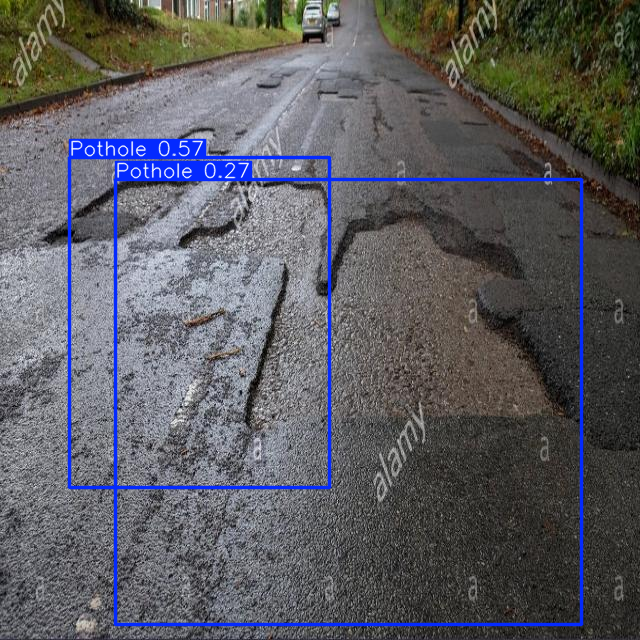

In [ ]:
import cv2
from ultralytics import YOLO
import os

# Load YOLO model with custom weights
yolo_model = YOLO("/content/drive/MyDrive/Pothole_Detector/Weights/best (1).pt")

# Load the image
image_path = "/content/drive/MyDrive/Dataset/Pothole/test/images/110_jpg.rf.48742c15a483cc0f54b081a91ae0709b.jpg"
img = cv2.imread(image_path)

# Check if the image was loaded correctly
if img is None:
    print("Error: Could not load image. Check the file path.")
else:
    # Perform object detection
    results = yolo_model(img)

    # Access the Results object from the list
    results = results[0]

    # Display or save the results
    results.show()  # Display results
    print(results)

In [ ]:
import cv2
import math
import cvzone
from ultralytics import YOLO

# Initialize video capture
video_path = "/content/drive/MyDrive/Pothole_Detector/Media/Potholes.mp4"
cap = cv2.VideoCapture(video_path)

# Load YOLO model with custom weights
model = YOLO("/content/drive/MyDrive/Pothole_Detector/Media/Potholes.mp4")

# Define class names
classNames = ['Pothole']

while True:
    success, img = cap.read()
    results = model(img, stream=True)
    for r in results:
        boxes = r.boxes
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

            w, h = x2 - x1, y2 - y1

            conf = math.ceil((box.conf[0] * 100)) / 100
            cls = int(box.cls[0])
            if conf > 0.4:
                cvzone.cornerRect(img, (x1, y1, w, h), t=2)
                cvzone.putTextRect(img, f'{classNames[cls]} {conf}', (max(0, x1), max(35, y1)), scale=1, thickness=1)

    cv2.imshow("Image", img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


TypeError: model='/content/drive/MyDrive/Pothole_Detector/Media/Potholes.mp4' is not a supported model format. Ultralytics supports: ('PyTorch', 'TorchScript', 'ONNX', 'OpenVINO', 'TensorRT', 'CoreML', 'TensorFlow SavedModel', 'TensorFlow GraphDef', 'TensorFlow Lite', 'TensorFlow Edge TPU', 'TensorFlow.js', 'PaddlePaddle', 'MNN', 'NCNN', 'IMX')
See https://docs.ultralytics.com/modes/predict for help.

In [ ]:
import cv2
import math
import cvzone
from ultralytics import YOLO

# Path to the video file
video_path = "/content/drive/MyDrive/Pothole_Detector/Media/Potholes.mp4"

# Load the YOLO model with custom weights
model = YOLO("/content/drive/MyDrive/Pothole_Detector/Weights/best (1).pt")  # Replace 'best.pt' with your trained model

# Define class names
classNames = ['Pothole']  # Modify if there are more classes

# Initialize video capture and get video properties
cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define video writer to save output
output_path = "/content/drive/MyDrive/Pothole_Detector/Media/Potholes_Output.mp4"
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

while True:
    success, img = cap.read()
    if not success:
        break  # Exit the loop when the video ends

    # Perform object detection
    results = model(img)  # Use model inference on the current frame
    for r in results:
        boxes = r.boxes
        for box in boxes:
            # Extract bounding box coordinates
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            w, h = x2 - x1, y2 - y1

            # Extract confidence and class ID
            conf = math.ceil((box.conf[0] * 100)) / 100  # Round confidence to two decimals
            cls = int(box.cls[0])

            if conf > 0.4:  # Apply confidence threshold
                # Draw rectangle and label
                cvzone.cornerRect(img, (x1, y1, w, h), t=2)
                cvzone.putTextRect(img, f'{classNames[cls]} {conf}',
                                   (max(0, x1), max(35, y1)), scale=1, thickness=1)

    # Write the annotated frame to the output video
    out.write(img)

    # Display the frame (optional)

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit early
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()

print("Processing complete. Output saved at:", output_path)



0: 384x640 1 Pothole, 2351.1ms
Speed: 2.7ms preprocess, 2351.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Pothole, 1860.7ms
Speed: 2.9ms preprocess, 1860.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 1888.2ms
Speed: 3.6ms preprocess, 1888.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Pothole, 1849.6ms
Speed: 2.7ms preprocess, 1849.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Potholes, 1846.2ms
Speed: 2.7ms preprocess, 1846.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Pothole, 2258.4ms
Speed: 4.7ms preprocess, 2258.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Potholes, 2920.7ms
Speed: 5.0ms preprocess, 2920.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Pothole, 2062.2ms
Speed: 8.0ms preprocess, 2062.2ms inference

KeyboardInterrupt: 

In [ ]:
import cv2
import math
import cvzone
from ultralytics import YOLO

# Path to the video file
video_path = "/content/drive/MyDrive/Pothole_Detector/Media/Potholes.mp4"

# Load the YOLO model with custom weights
model = YOLO("/content/drive/MyDrive/Pothole_Detector/Weights/best (1).pt")  # Replace 'best.pt' with your trained model

# Define class names
classNames = ['Pothole']  # Modify if there are more classes

# Initialize video capture and get video properties
cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define video writer to save output
output_path = "/content/drive/MyDrive/Pothole_Detector/Media/Potholes_Output.mp4"
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

while True:
    success, img = cap.read()
    if not success:
        break  # Exit the loop when the video ends

    # Perform object detection
    results = model(img)  # Use model inference on the current frame
    for r in results:
        boxes = r.boxes
        for box in boxes:
            # Extract bounding box coordinates
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            w, h = x2 - x1, y2 - y1

            # Extract confidence and class ID
            conf = math.ceil((box.conf[0] * 100)) / 100  # Round confidence to two decimals
            cls = int(box.cls[0])

            if conf > 0.4:  # Apply confidence threshold
                # Draw rectangle and label
                cvzone.cornerRect(img, (x1, y1, w, h), t=2)
                cvzone.putTextRect(img, f'{classNames[cls]} {conf}',
                                   (max(0, x1), max(35, y1)), scale=1, thickness=1)

    # Write the annotated frame to the output video
    out.write(img)

    # Display the frame (optional)
    # The following line was causing the error. It has been commented out.
    # if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit early
    #     break
quitq
# Release resources
cap.release()
out.release()
# cv2.destroyAllWindows()  # This line is also causing the error. It has been commented out.
print("Processing complete. Output saved at:", output_path) # output_path1 was changed to output_path


0: 384x640 1 Pothole, 1796.8ms
Speed: 2.9ms preprocess, 1796.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Pothole, 1769.8ms
Speed: 3.1ms preprocess, 1769.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 2033.8ms
Speed: 3.4ms preprocess, 2033.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Pothole, 2857.7ms
Speed: 6.1ms preprocess, 2857.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Potholes, 2081.6ms
Speed: 2.6ms preprocess, 2081.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Pothole, 1798.7ms
Speed: 2.8ms preprocess, 1798.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Potholes, 1757.6ms
Speed: 2.8ms preprocess, 1757.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Pothole, 1762.8ms
Speed: 4.0ms preprocess, 1762.8ms inference


KeyboardInterrupt



In [ ]:
import cv2
import math
import cvzone
from ultralytics import YOLO

# Path to the video file
video_path = "/content/drive/MyDrive/Pothole_Detector/Media/Potholes.mp4"

# Load the YOLO model with custom weights
model = YOLO("/content/drive/MyDrive/Pothole_Detector/Weights/best (1).pt")  # Replace with your trained model

# Define class names
classNames = ['Pothole']  # Modify if there are more classes

# Initialize video capture
cap = cv2.VideoCapture(video_path)

while True:
    success, img = cap.read()
    if not success:
        break  # Exit the loop when the video ends

    # Perform object detection
    results = model(img)  # Use model inference on the current frame
    detected = False

    for r in results:
        boxes = r.boxes
        for box in boxes:
            # Extract bounding box coordinates
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            w, h = x2 - x1, y2 - y1

            # Extract confidence and class ID
            conf = math.ceil((box.conf[0] * 100)) / 100  # Round confidence to two decimals
            cls = int(box.cls[0])

            if conf > 0.4:  # Apply confidence threshold
                detected = True
                # Draw rectangle and label
                cvzone.cornerRect(img, (x1, y1, w, h), t=2)
                cvzone.putTextRect(img, f'{classNames[cls]} {conf}',
                                   (max(0, x1), max(35, y1)), scale=1, thickness=1)

    # Display only if potholes are detected
    if detected:
        cv2.imshow("Pothole Detection", img)

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit early
        break

# Release resources
cap.release()
cv2.destroyAllWindows()



0: 384x640 1 Pothole, 1885.9ms
Speed: 3.0ms preprocess, 1885.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Pothole, 1910.7ms
Speed: 2.9ms preprocess, 1910.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


In [ ]:
import cv2
import math
import cvzone
from ultralytics import YOLO
from google.colab.patches import cv2_imshow  # Import for Colab compatibility

# Path to the video file
video_path = "/content/drive/MyDrive/Pothole_Detector/Media/Potholes.mp4"

# Load the YOLO model with custom weights
model = YOLO("/content/drive/MyDrive/Pothole_Detector/Weights/best (1).pt")

# Define class names
classNames = ['Pothole']

# Initialize video capture
cap = cv2.VideoCapture(video_path)

while True:
    success, img = cap.read()
    if not success:
        break  # Exit the loop when the video ends

    # Perform object detection
    results = model(img)
    detected = False

    for r in results:
        boxes = r.boxes
        for box in boxes:
            # Extract bounding box coordinates
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            w, h = x2 - x1, y2 - y1

            # Extract confidence and class ID
            conf = math.ceil((box.conf[0] * 100)) / 100
            cls = int(box.cls[0])

            if conf > 0.4:  # Apply confidence threshold
                detected = True
                # Draw rectangle and label
                cvzone.cornerRect(img, (x1, y1, w, h), t=2)
                cvzone.putTextRect(img, f'{classNames[cls]} {conf}',
                                   (max(0, x1), max(35, y1)), scale=1, thickness=1)

    # Display only if potholes are detected
    if detected:
        cv2_imshow(img)  # Use cv2_imshow instead of cv2.imshow

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit early
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
import math
import cvzone
from ultralytics import YOLO
from google.colab.patches import cv2_imshow  # Import for Colab compatibility

# Path to the video file
video_path = "/content/drive/MyDrive/Pothole_Detector/Media/Potholes.mp4"

# Load the YOLO model with custom weights
model = YOLO("/content/drive/MyDrive/Pothole_Detector/Weights/best (1).pt")

# Define class names
classNames = ['Pothole']

# Initialize video capture
cap = cv2.VideoCapture(video_path)

while True:
    success, img = cap.read()
    if not success:
        break  # Exit the loop when the video ends

    # Perform object detection
    results = model(img)
    detected = False

    for r in results:
        boxes = r.boxes
        for box in boxes:
            # Extract bounding box coordinates
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            w, h = x2 - x1, y2 - y1

            # Extract confidence and class ID
            conf = math.ceil((box.conf[0] * 100)) / 100
            cls = int(box.cls[0])

            if conf > 0.4:  # Apply confidence threshold
                detected = True
                # Draw rectangle and label
                cvzone.cornerRect(img, (x1, y1, w, h), t=2)
                cvzone.putTextRect(img, f'{classNames[cls]} {conf}',
                                   (max(0, x1), max(35, y1)), scale=1, thickness=1)

    # Display only if potholes are detected
    if detected:
        cv2_imshow(img)  # Use cv2_imshow instead of cv2.imshow

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit early
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
import math
import cvzone
from ultralytics import YOLO

# Path to the video file
video_path = "/content/drive/MyDrive/Pothole_Detector/Media/Potholes.mp4"

# Load the YOLO model with custom weights
model = YOLO("/content/drive/MyDrive/Pothole_Detector/Weights/best (1).pt")  # Replace with your trained model

# Define class names
classNames = ['Pothole']  # Modify if there are more classes

# Initialize video capture
cap = cv2.VideoCapture(video_path)

while True:
    success, img = cap.read()
    if not success:
        break  # Exit the loop when the video ends

    # Perform object detection
    results = model(img)  # Use model inference on the current frame
    detected = False

    for r in results:
        boxes = r.boxes
        for box in boxes:
            # Extract bounding box coordinates
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            w, h = x2 - x1, y2 - y1

            # Extract confidence and class ID
            conf = math.ceil((box.conf[0] * 100)) / 100  # Round confidence to two decimals
            cls = int(box.cls[0])

            if conf > 0.4:  # Apply confidence threshold
                detected = True
                # Draw rectangle and label
                cvzone.cornerRect(img, (x1, y1, w, h), t=2)
                cvzone.putTextRect(img, f'{classNames[cls]} {conf}',
                                   (max(0, x1), max(35, y1)), scale=1, thickness=1)

    # Display only if potholes are detected
    if detected:
        cv2.imshow("Pothole Detection", img)

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit early
        break

# Release resources
cap.release()
cv2.destroyAllWindows()



0: 384x640 1 Pothole, 1821.8ms
Speed: 3.1ms preprocess, 1821.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Pothole, 1777.6ms
Speed: 2.9ms preprocess, 1777.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


In [ ]:
from ultralytics import YOLO
model_path = '/content/drive/MyDrive/Pothole_Detector/Weights/best (1).pt'

model = YOLOv8(model_path)
results = model(source='/content/p.mp4', conf=0.25,save=True)

NameError: name 'YOLOv8' is not defined

In [ ]:
from ultralytics import YOLO

model_path = '/content/drive/MyDrive/Pothole_Detector/Weights/best (1).pt'

# Instead of YOLOv8, use YOLO
model = YOLO(model_path)
results = model(source='/content/drive/MyDrive/Pothole_Detector/Media/Potholes.mp4', conf=0.25,save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/2278) /content/drive/MyDrive/Pothole_Detector/Media/Potholes.mp4: 384x640 1 Pothole, 107.6ms
video 1/1 (frame 2/2278) /content/drive/MyDrive/Pothole_Detector/Media/Potholes.mp4: 384x640 1 Pothole, 39.8ms
video 1/1 (frame 3/2278) /content/drive/MyDrive/Pothole_Detector/Media/Potholes.mp4: 384x640 (no detections), 38.5ms
video 1/1 (frame 4/2278) /content/drive/MyDrive/Pothole_Detector/Media/Potholes.mp4: 384x640 1 Pothole, 37.3ms
video

In [ ]:
from ultralytics import YOLO

model_path = '/content/drive/MyDrive/Pothole_Detector/Weights/best (1).pt'

# Instead of YOLOv8, use YOLO
model = YOLO(model_path)
results = model(source='/content/drive/MyDrive/Pothole_Detector/Media/Potholes.mp4',stream=True)

In [ ]:
from ultralytics import YOLO
from sklearn.metrics import confusion_matrix, classification_report
import cv2
import numpy as np
import os

# Load the trained model
model = YOLO("/content/drive/MyDrive/Pothole_Detector/Weights/best (1).pt")  # Replace with your model path

# Paths to datasets
train_data_path = "/content/drive/MyDrive/Dataset/Pothole/train"  # Path to training dataset
test_data_path = "/content/drive/MyDrive/Dataset/Pothole/test"   # Path to testing dataset

# Function to evaluate model accuracy on a dataset
def evaluate_model(dataset_path):
    all_true_labels = []
    all_pred_labels = []
    for image_file in os.listdir(dataset_path):
        image_path = os.path.join(dataset_path, image_file)
        image = cv2.imread(image_path)
        results = model(image)  # Predict on the image
        preds = results[0].boxes.xyxy  # Get bounding boxes and class predictions

        # True labels should be loaded from annotations (update as per your annotation format)
        # Assuming a dummy true label
        true_labels = [1]  # Replace this with your actual true labels

        pred_labels = [int(pred[-1]) for pred in preds]  # Predicted class IDs
        all_true_labels.extend(true_labels)
        all_pred_labels.extend(pred_labels)

    # Compute accuracy and classification report
    cm = confusion_matrix(all_true_labels, all_pred_labels)
    report = classification_report(all_true_labels, all_pred_labels, target_names=["No Pothole", "Pothole"])
    accuracy = np.trace(cm) / np.sum(cm)
    return accuracy, report

# Evaluate on training and testing datasets
train_accuracy, train_report = evaluate_model(train_data_path)
test_accuracy, test_report = evaluate_model(test_data_path)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Training Classification Report:\n", train_report)
print("\nTesting Accuracy:", test_accuracy)
print("Testing Classification Report:\n", test_report)


WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 99.2ms
image 2/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 42.8ms
Speed: 6.5ms preprocess, 71.0ms inference, 56.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 47.8ms
image 2/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 40.8ms
Speed: 1.8ms preprocess, 44.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.10

ValueError: Found input variables with inconsistent numbers of samples: [3, 0]

In [ ]:
from ultralytics import YOLO
from sklearn.metrics import confusion_matrix, classification_report
import cv2
import numpy as np
import os

# Load the trained model
model = YOLO("/content/drive/MyDrive/Pothole_Detector/Weights/best (1).pt")  # Replace with your model path

# Paths to datasets
train_data_path = "/content/drive/MyDrive/Dataset/Pothole/train"  # Path to training dataset
test_data_path = "/content/drive/MyDrive/Dataset/Pothole/test"   # Path to testing dataset

# Function to evaluate model accuracy on a dataset
def evaluate_model(dataset_path):
    all_true_labels = []
    all_pred_labels = []
    for image_file in os.listdir(dataset_path):
        image_path = os.path.join(dataset_path, image_file)
        image = cv2.imread(image_path)
        results = model(image)  # Predict on the image
        preds = results[0].boxes.xyxy  # Get bounding boxes and class predictions

        # True labels should be loaded from annotations (update as per your annotation format)
        # Assuming a dummy true label
        # Replace this with your actual true labels and ensure len(true_labels) == len(pred_labels)
        true_labels = [1] * len(preds) if len(preds) > 0 else [0] # Updated true labels


        pred_labels = [int(pred[-1]) for pred in preds]  # Predicted class IDs
        all_true_labels.extend(true_labels)
        all_pred_labels.extend(pred_labels)

    # Compute accuracy and classification report
    cm = confusion_matrix(all_true_labels, all_pred_labels)
    report = classification_report(all_true_labels, all_pred_labels, target_names=["No Pothole", "Pothole"])
    accuracy = np.trace(cm) / np.sum(cm)
    return accuracy, report

# Evaluate on training and testing datasets
train_accuracy, train_report = evaluate_model(train_data_path)
test_accuracy, test_report = evaluate_model(test_data_path)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Training Classification Report:\n", train_report)
print("\nTesting Accuracy:", test_accuracy)
print("Testing Classification Report:\n", test_report)

WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 54.9ms
image 2/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 40.9ms
Speed: 4.0ms preprocess, 47.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 55.6ms
image 2/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 41.5ms
Speed: 11.8ms preprocess, 48.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.10

ValueError: Found input variables with inconsistent numbers of samples: [3, 0]


0: 640x640 6 Potholes, 62.6ms
Speed: 7.1ms preprocess, 62.6ms inference, 773.0ms postprocess per image at shape (1, 3, 640, 640)


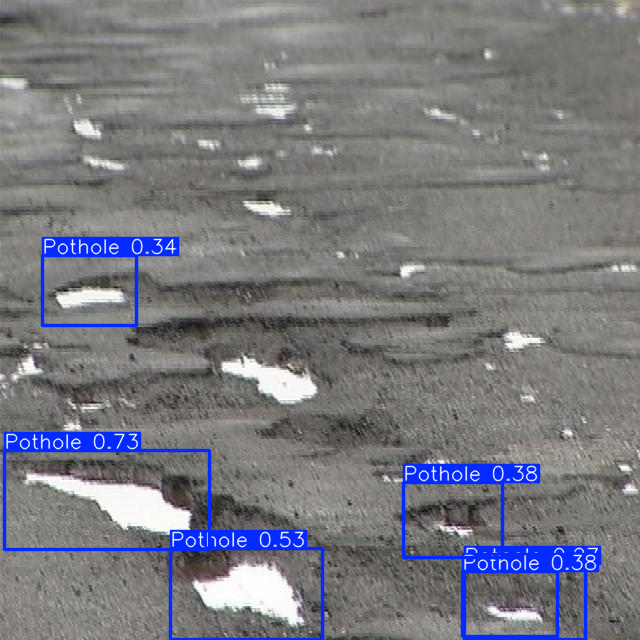

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Pothole'}
obb: None
orig_img: array([[[127, 132, 131],
        [121, 126, 125],
        [118, 123, 122],
        ...,
        [138, 143, 152],
        [138, 140, 150],
        [136, 138, 148]],

       [[132, 137, 136],
        [126, 131, 130],
        [122, 127, 126],
        ...,
        [136, 141, 150],
        [136, 138, 148],
        [134, 136, 146]],

       [[133, 138, 137],
        [127, 132, 131],
        [123, 128, 127],
        ...,
        [137, 142, 151],
        [138, 140, 150],
        [136, 138, 148]],

       ...,

       [[117, 120, 124],
        [120, 123, 127],
        [124, 127, 131],
        ...,
        [ 91,  95,  96],
        [ 98, 102, 103],
        [101, 105, 106]],

       [[110, 113, 117],
        [121, 124, 128],
        [130, 133, 137],
        ...,
        [ 89,  93,  94],
        [ 98, 102, 103],
        [100

In [ ]:
import cv2
from ultralytics import YOLO
import os

# Load YOLO model with custom weights
yolo_model = YOLO("/content/drive/MyDrive/Pothole_Detector/Weights/best (4).pt")

# Load the image
image_path = "/content/drive/MyDrive/Dataset/Pothole/test/images/171_jpg.rf.6271caf0918c5f21921af43b87d77d73.jpg"
img = cv2.imread(image_path)

# Check if the image was loaded correctly
if img is None:
    print("Error: Could not load image. Check the file path.")
else:
    # Perform object detection
    results = yolo_model(img)

    # Access the Results object from the list
    results = results[0]

    # Display or save the results
    results.show()  # Display results
    print(results)

In [ ]:
from ultralytics import YOLO

model_path = '/content/drive/MyDrive/Pothole_Detector/Weights/best (1).pt'

# Instead of YOLOv8, use YOLO
model = YOLO(model_path)
results = model(source='/content/drive/MyDrive/Pothole_Detector/Media/Potholes.mp4', conf=0.25,save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/2278) /content/drive/MyDrive/Pothole_Detector/Media/Potholes.mp4: 384x640 1 Pothole, 41.4ms
video 1/1 (frame 2/2278) /content/drive/MyDrive/Pothole_Detector/Media/Potholes.mp4: 384x640 1 Pothole, 39.8ms
video 1/1 (frame 3/2278) /content/drive/MyDrive/Pothole_Detector/Media/Potholes.mp4: 384x640 (no detections), 37.9ms
video 1/1 (frame 4/2278) /content/drive/MyDrive/Pothole_Detector/Media/Potholes.mp4: 384x640 1 Pothole, 30.2ms
video 

NameError: name 'history' is not defined

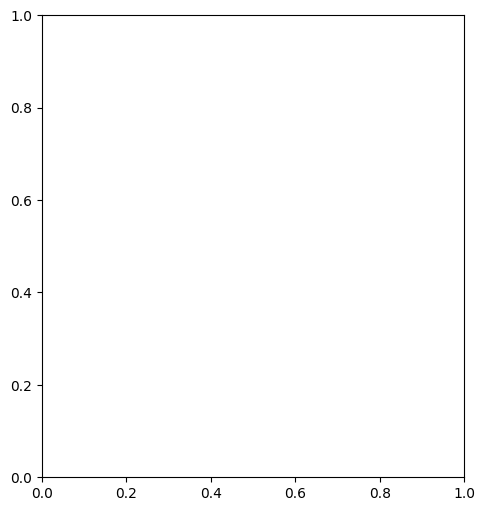

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt
import json # Import the json module

# ... (rest of your code to load and evaluate the model) ...

# Load training history from a JSON file (if you saved it)
history_file_path = "/content/drive/MyDrive/Dataset/Pothole/train/results.json"  # Update with the correct path
try:
  with open(history_file_path, 'r') as f:
    history_data = json.load(f)

  # Accessing specific metrics (e.g., box_loss, cls_loss, df_loss)
  box_loss = [epoch['box_loss'] for epoch in history_data]
  cls_loss = [epoch['cls_loss'] for epoch in history_data]
  dfl_loss = [epoch['dfl_loss'] for epoch in history_data]
  epochs = range(1, len(history_data) + 1)  # Assuming history_data contains the epoch information

  # Create the plots
  plt.figure(figsize=(12, 6))

  # Plot losses
  plt.subplot(1, 2, 1)
  plt.plot(epochs, box_loss, label='Training Box Loss')
  plt.plot(epochs, cls_loss, label='Training Cls Loss')
  plt.plot(epochs, dfl_loss, label='Training Dfl Loss')

  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(loc='upper right')
  plt.title('Training Losses')


  plt.tight_layout()
  plt.show()

except FileNotFoundError:
  print(f"Error: File '{history_file_path}' not found. Make sure it exists.")
except json.JSONDecodeError:
  print(f"Error: Could not decode JSON data in '{history_file_path}'.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

An unexpected error occurred: 'utf-8' codec can't decode byte 0x80 in position 64: invalid start byte
